<a href="https://colab.research.google.com/github/maxmiloiano/UAS-Machine-Learning/blob/main/milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving milknew.csv to milknew.csv

Membaca file: milknew.csv

Baris pertama dari dataset:
    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0  6.6          35      1     0     1          0     254    high
1  6.6          36      0     1     0          1     253    high
2  8.5          70      1     1     1          1     246     low
3  9.5          34      1     1     0          1     255     low
4  6.6          37      0     0     0          0     255  medium

Informasi dataset sebelum preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7 

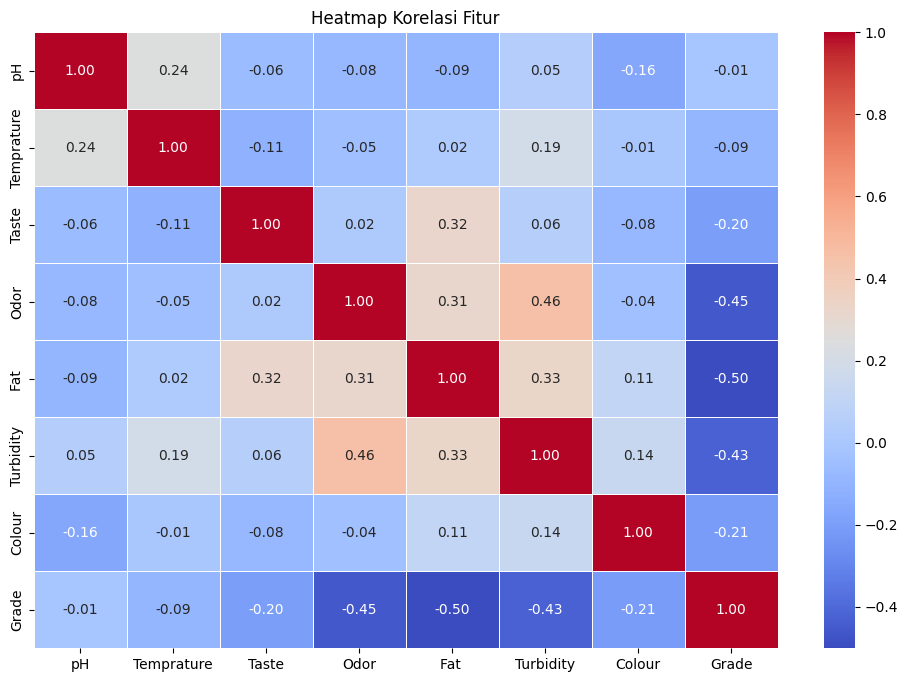


Dataset yang telah diproses telah disimpan sebagai 'processed_data.csv'.

Menampilkan histogram untuk setiap fitur:


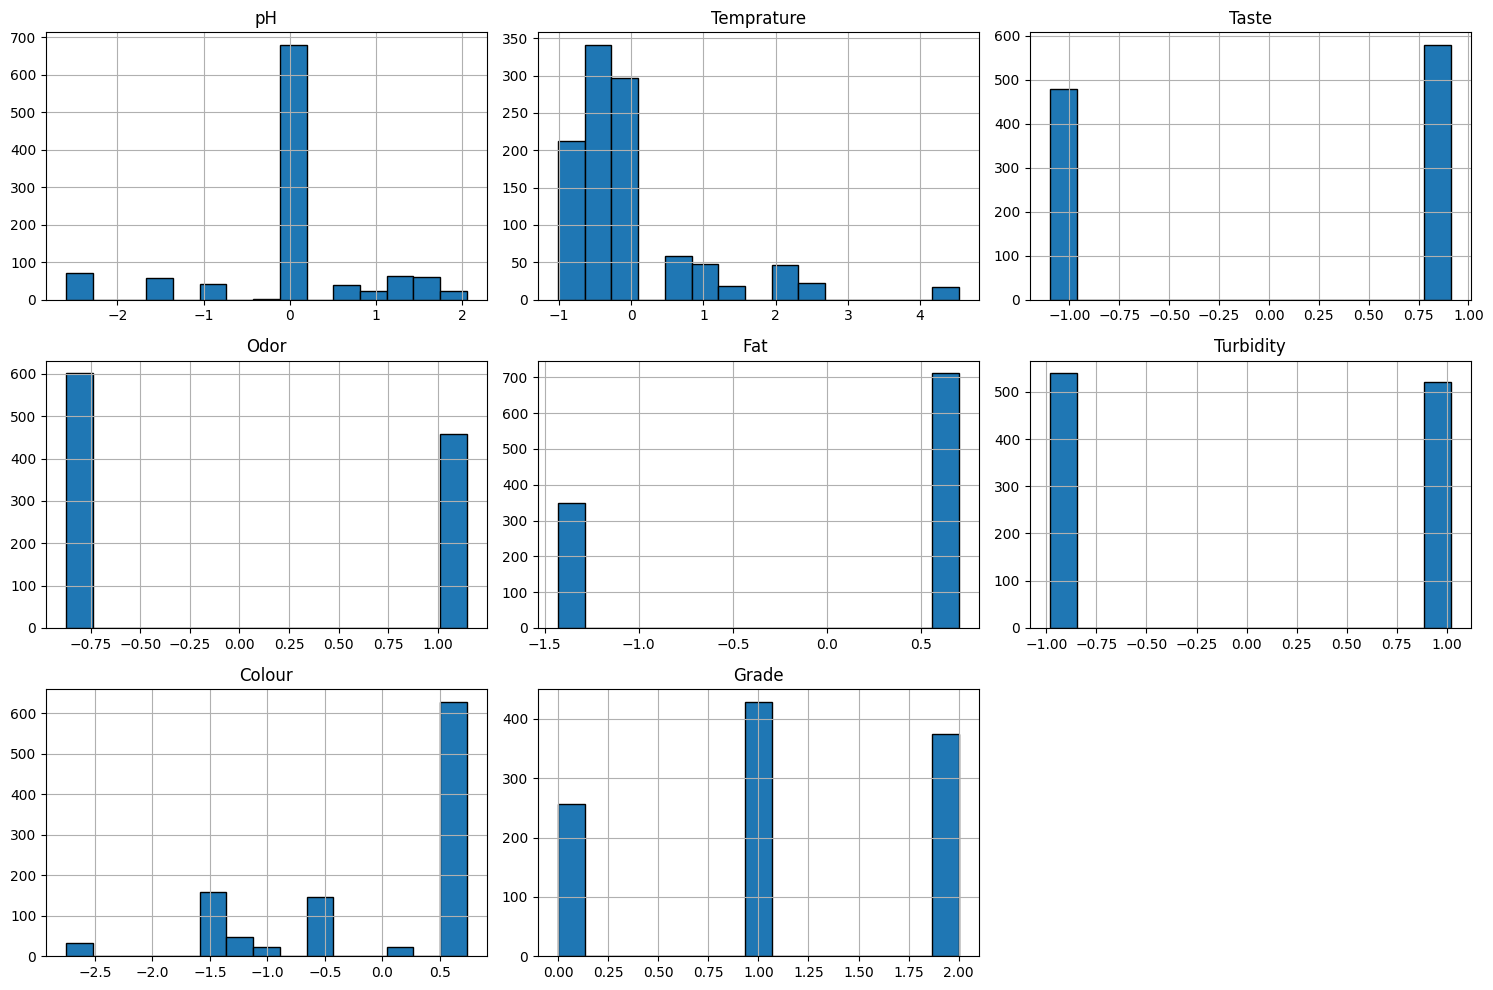


Fitur yang dihapus karena korelasi tinggi: []

Evaluasi Model Logistic Regression:
Accuracy: 0.8396
Precision: 0.8251
Recall: 0.8340
F1-Score: 0.8269

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        48
           1       0.86      0.88      0.87        78
           2       0.93      0.83      0.88        86

    accuracy                           0.84       212
   macro avg       0.83      0.83      0.83       212
weighted avg       0.85      0.84      0.84       212



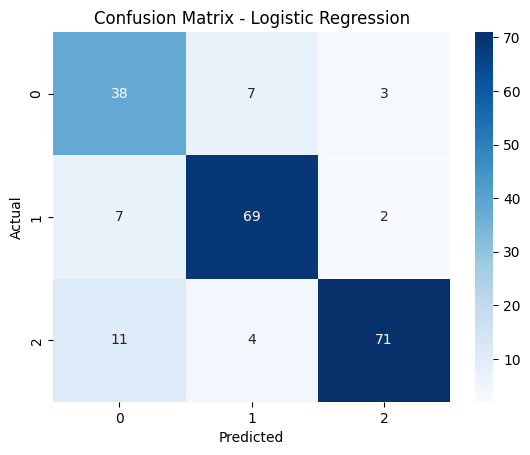


Evaluasi Model Random Forest:
Accuracy: 0.9953
Precision: 0.9932
Recall: 0.9957
F1-Score: 0.9944

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78
           2       1.00      1.00      1.00        86

    accuracy                           1.00       212
   macro avg       0.99      1.00      0.99       212
weighted avg       1.00      1.00      1.00       212



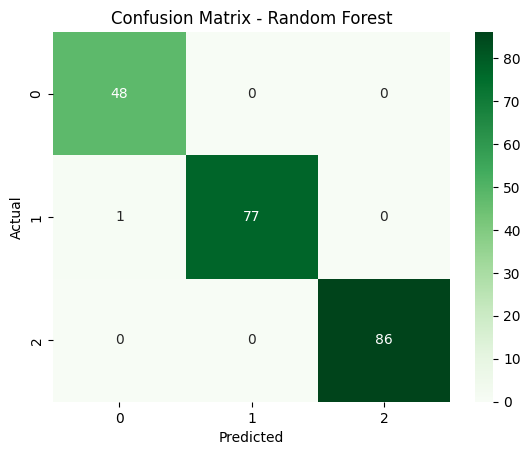


Perbandingan Hasil:
Logistic Regression - Accuracy: 0.8396
Random Forest - Accuracy: 0.9953

Model telah disimpan.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from joblib import dump
from google.colab import files

# Upload file (gunakan uploader di Google Colab)
uploaded = files.upload()

# Memuat dataset ke dalam Pandas DataFrame
for file_name in uploaded.keys():
    print(f"\nMembaca file: {file_name}")
    data = pd.read_csv(file_name)

# Menampilkan beberapa baris pertama dataset setelah diupload
print("\nBaris pertama dari dataset:")
print(data.head())

# Informasi dataset
print("\nInformasi dataset sebelum preprocessing:")
print(data.info())

# --- 1. Preprocessing Data ---

# a. Pisahkan kolom numerik dan kategorikal
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# b. Tangani missing values
print("\nJumlah missing values sebelum diisi:")
print(data.isnull().sum())

# Untuk kolom numerik: Isi dengan rata-rata
if not numerical_cols.empty:
    data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Untuk kolom kategorikal: Isi dengan modus
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

print("\nJumlah missing values setelah diisi:")
print(data.isnull().sum())

# c. Encoding kolom kategorikal
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# d. Normalisasi kolom numerik
scaler = StandardScaler()
if not numerical_cols.empty:
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Menampilkan dataset setelah preprocessing
print("\nDataset setelah preprocessing:")
print(data.head())
print("\nInformasi dataset setelah preprocessing:")
print(data.info())

# --- Heatmap Korelasi ---
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur")
plt.show()


# Simpan dataset setelah preprocessing ke file CSV
processed_file_name = "processed_data.csv"
data.to_csv(processed_file_name, index=False)
print(f"\nDataset yang telah diproses telah disimpan sebagai '{processed_file_name}'.")

# --- Visualisasi Histogram untuk setiap fitur ---
print("\nMenampilkan histogram untuk setiap fitur:")
data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

# --- 2. Feature Engineering ---

# a. Feature Creation: Buat fitur interaksi antara Temperature dan pH
if 'Temperature' in data.columns and 'pH' in data.columns:
    data['Temp_pH_Interaction'] = data['Temperature'] * data['pH']

# b. Binning (Discretization): Mengelompokkan nilai pH menjadi kategori
if 'pH' in data.columns:
    data['pH_Category'] = pd.cut(data['pH'], bins=[0, 4, 7, 10], labels=['Acidic', 'Neutral', 'Alkaline'])
    data['pH_Category'] = encoder.fit_transform(data['pH_Category'])

# c. Feature Selection: Hapus fitur yang memiliki korelasi sangat tinggi (>0.9)
correlation_matrix = data.corr()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
data.drop(columns=high_corr_features, inplace=True)
print(f"\nFitur yang dihapus karena korelasi tinggi: {high_corr_features}")

# --- 3. Memisahkan Fitur dan Target ---
X = data.drop(columns=['Grade'])  # Menghapus kolom 'Grade' dari fitur
y = data['Grade']  # Kolom 'Grade' sebagai target

# Membagi dataset menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Implementasi Algoritma Machine Learning ---

# a. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
param_grid_log_reg = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}
grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)
log_reg_best = grid_log_reg.best_estimator_
y_pred_log_reg = log_reg_best.predict(X_test)

# b. Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_
y_pred_rf = rf_best.predict(X_test)

# --- 5. Evaluasi Performa Model ---
# a. Logistic Regression
print("\nEvaluasi Model Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# b. Random Forest
print("\nEvaluasi Model Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Bandingkan Hasil Kedua Model ---
print("\nPerbandingan Hasil:")
print(f"Logistic Regression - Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Random Forest - Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# --- 6. Simpan Model ---
dump(log_reg_best, "logistic_regression_model.joblib")
dump(rf_best, "random_forest_model.joblib")
print("\nModel telah disimpan.")

# --- 7. Unduh Model (Opsional) ---
files.download("logistic_regression_model.joblib")
files.download("random_forest_model.joblib")


In [2]:


# Input parameter dari user
pH = float(input("Masukkan nilai pH: "))
Temperature = float(input("Masukkan nilai Temperature: "))
Taste = float(input("Masukkan nilai Taste: "))
Odor = float(input("Masukkan nilai Odor: "))
Fat = float(input("Masukkan nilai Fat: "))
Turbidity = float(input("Masukkan nilai Turbidity: "))
Colour = float(input("Masukkan nilai Colour (240-255): "))

# Jika Taste = 0 dan Odor = 0, tampilkan hasil langsung tanpa menjalankan prediksi model
if Taste == 0 and Odor == 0:
    print("\nHasil Prediksi:")
    print("Logistic Regression: Tidak Layak")
    print("Random Forest: Tidak Layak")
else:
    # Load dataset yang sudah di preprocessing sebelumnya
    try:
        data = pd.read_csv('processed_data.csv')
    except FileNotFoundError:
        print("File 'processed_data.csv' tidak ditemukan. Pastikan file sudah di upload.")
        exit()

    # Pisahkan fitur dan target pada data
    X = data.drop('Grade', axis=1)
    y = data['Grade']

    # Buat dataframe dari input user, memastikan urutan dan nama kolom sama dengan X
    new_data = pd.DataFrame([[pH, Temperature, Taste, Odor, Fat, Turbidity, Colour]],
                             columns=X.columns)

    # Pastikan fitur input user sesuai skala data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    new_data_scaled = scaler.transform(new_data)

    # Inisialisasi model
    logreg_model = LogisticRegression(random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    # Latih model dengan data yang sudah ada
    logreg_model.fit(X_scaled, y)
    rf_model.fit(X_scaled, y)

    # Prediksi dengan data baru dari input user
    logreg_pred = logreg_model.predict(new_data_scaled)
    rf_pred = rf_model.predict(new_data_scaled)

    # Menampilkan hasil prediksi
    logreg_result = 'Layak' if logreg_pred[0] == 1 else 'Tidak Layak'
    rf_result = 'Layak' if rf_pred[0] == 1 else 'Tidak Layak'

    print("\nHasil Prediksi:")
    print(f"Logistic Regression: {logreg_result}")
    print(f"Random Forest: {rf_result}")


Masukkan nilai pH: 6.6
Masukkan nilai Temperature: 35
Masukkan nilai Taste: 1
Masukkan nilai Odor: 0
Masukkan nilai Fat: 1
Masukkan nilai Turbidity: 0
Masukkan nilai Colour (240-255): 254

Hasil Prediksi:
Logistic Regression: Layak
Random Forest: Layak
